# Machine Learning Project - Churn Modeling

## Business Objective
Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on the revenues. Companies often seek to know which customers are likely to churn in the recent future so that a timely action could be taken to prevent it

## Data

Dataset is place [here](../data/customer_churn/Dataset.csv) 

## Problem Statement

You have been assigned the task to build for this Telecom company a Logistic Regression Machine Learning model that predicts which of their customers are likely to churn (stop using their service in future). For more details on the intermediate and final outputs expected, refer to the list of deliverables mentioned in the “Model Building” and “Model Validation” sections below.

## Data Description
The dataset provided for this activity consists of 11 features where 10 are independent features and 1 is a target variable. Features in this dataset are described as below :

- Churn : 1 if customer cancelled service, 0 if not (Target)
- AccountWeeks : number of weeks customer has had active account
- ContractRenewal : 1 if customer recently renewed contract, 0 if not
- DataPlan : 1 if customer has data plan, 0 if not
- DataUsage : gigabytes of monthly data usage
- CustServCalls : number of calls into customer service
- DayMins : average daytime minutes per month
- DayCalls : average number of daytime calls
- MonthlyCharge : average monthly bill
- OverageFee : largest overage fee in last 12 months
- RoamMins : average number of roaming minutes

## Model Building:

- Show Bi-variate plots (scatter/ bar) of all meaningful variables with the dependent variable

- Present your final model results (show what’s applicable from the below list):
    - List of variables which came significant
    - Beta coefficients for the respective variables along with, p-values
    - In case of a Decision Tree model, show Rules or the Decision Tree

- Summarize the steps followed to finalize your model - consisting of the below steps (as applicable)
    - Sampling
    - Feature Engineering
    - Performance comparison between Train and Test
    - Use of Cross validation

- While developing the model, you would have gotten a few candidate models which were not as good as the final model (in terms of performance, multicollinearity, or statistical stability etc.). Show a few of these candidate models and explain their shortcomings

- Show what kind of feature engineering did you apply in your project and why (include in your results what’s applicable from below)
    - Dummy Variables
    - Label Encoding
    - Any bin-based variable created -what was the significance/rationale of binning
    - Any new derived variables created using the raw variables – For e.g., Ratio based, difference based, % difference based / Rate of change, etc.

- If the provided dataset is unbalanced, what steps did you take to balance? Also explain the technique used to oversample/undersample the dataset? (Assume an event rate of less than 5% indicative of class imbalance, you can still use oversample/undersample to improve model performance even if the event rate is between 5-10%)

- Demonstrate Live how your model will assign class/ or compute the probability for a new data point?

- Provide your understanding of the next steps that the client/ end user needs to follow to deploy your model at their end. Think on the below lines:
    - Any technical/infrastructure requirements that the client needs to meet?
    - What files do you need to provide them?
    - What kind of data cleaning and preprocessing would the client need to do before using the model?
    - How will the client use your model on new data?
    - How will the client know that the model is performing well on new data points?

- Show your model’s performance on the below metrics (both train and test samples)
    - Confusion Matrix
    - Classification Report
    - Rank ordering test results (Rank ordering is an important measure of model performance and its ability to separate out the event from the non-events). You can divide your probability predictions into deciles and look at the event rate in each decile.

- For the given business problem which of the below metric(s) did you choose and why? Include in your final output any additional activity performed (and its results) to get to the best values of the below metrics (F1-Score, AUC-ROC curve, AUC-ROC Accuracy).
Accuracy
    - Accuracy
    - Precision
    - Recall









# Reading the data 

In [538]:
import pandas as pd

In [539]:
df = pd.read_csv('../data/customer_churn/Dataset.csv')

In [540]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [541]:
df.shape

(3333, 11)

# EDA

Looking at data types

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Fixing the variables which are categorical in nature.

In [543]:
df['Churn'] = pd.Categorical(df['Churn'])
df['ContractRenewal'] = pd.Categorical(df['ContractRenewal'])
df['DataPlan'] = pd.Categorical(df['DataPlan'])
df['CustServCalls'] = pd.Categorical(df['CustServCalls'])

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   category
 3   DataPlan         3333 non-null   category
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   category
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(4), float64(5), int64(2)
memory usage: 196.2 KB


In [545]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:>

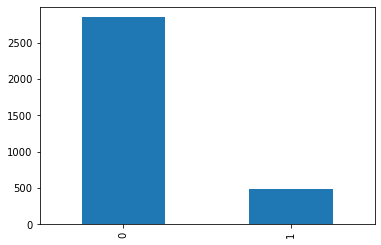

In [546]:
df['Churn'].value_counts().plot(kind='bar')

Measuring in percentages

In [547]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

<AxesSubplot:ylabel='Churn'>

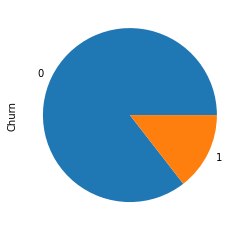

In [548]:
df['Churn'].value_counts(normalize=True).plot(kind='pie')

So about 14.5% of our users churned.

Now, let's look at our continuous variables and see if we can find any large differences in behaviour of people who churned, when compared to people who did not.

In [549]:
df.groupby('Churn').mean()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,
0,100.793684,0.862151,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.546957,206.914079,101.335404,59.190062,10.623085,10.700000


<AxesSubplot:title={'center':'RoamMins'}, xlabel='Churn'>

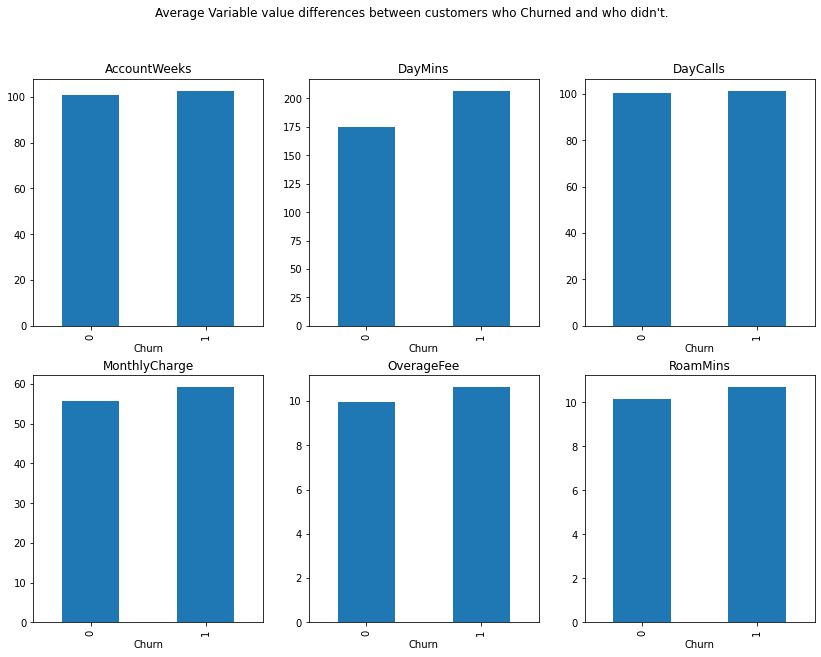

In [550]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
 
fig.suptitle('Average Variable value differences between customers who Churned and who didn\'t.')

df.groupby('Churn').mean()['AccountWeeks'].plot(kind='bar',ax=axes[0, 0],title='AccountWeeks')
df.groupby('Churn').mean()['DayMins'].plot(kind='bar',ax=axes[0, 1],title='DayMins')
df.groupby('Churn').mean()['DayCalls'].plot(kind='bar',ax=axes[0, 2],title='DayCalls')


df.groupby('Churn').mean()['MonthlyCharge'].plot(kind='bar',ax=axes[1, 0],title='MonthlyCharge')
df.groupby('Churn').mean()['OverageFee'].plot(kind='bar',ax=axes[1, 1],title='OverageFee')
df.groupby('Churn').mean()['RoamMins'].plot(kind='bar',ax=axes[1, 2],title='RoamMins')

Let's talk about our findings
- Account weeks did not really provide much insight other than the fact that it barely changed between churned and non-churned customers.
- Daysmins tells us something interesting, The customers who churned are actually using more mins on the network rather than less.
- DayCalls is the same accross the board. No differences here.
- MonthlyCharge is more for the customers who churned, this is BAD !!. This means that our high paying customers are leaving which is worse for us.
- OverageFee is more for the customers who churned, This shows that the customers leaving us were charges more, this could be one of the potential reasons for the customers churning. 
- RoamMins is again, more for the customers who churned, this along with other variables makes it very clear that the customers who are churning were more active users of the network. 

Let's also look at the data and it's distribution rather than just the mean of the continuous variable, this should give us a better understanding of the variable.

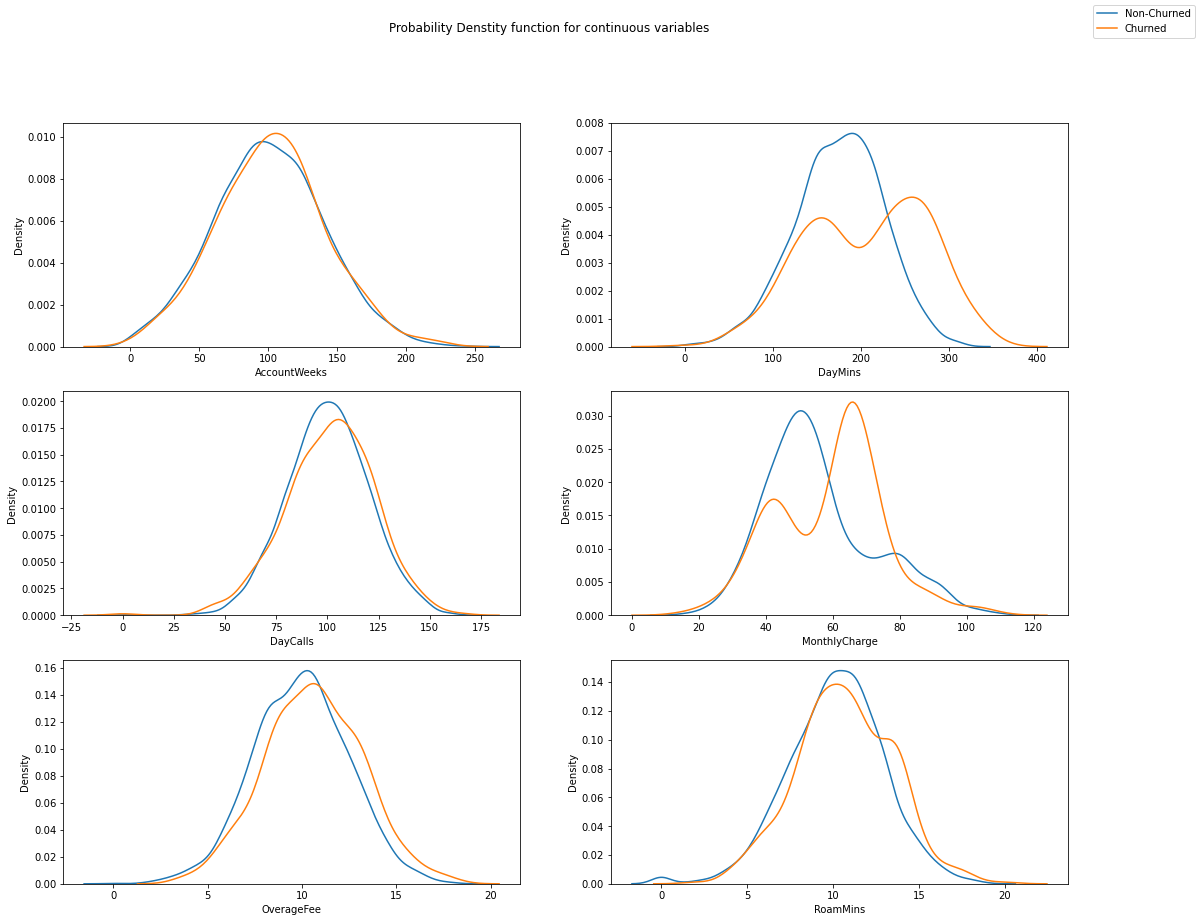

In [551]:
import seaborn as sns
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
 
fig.suptitle('Probability Denstity function for continuous variables')


sns.kdeplot(df[df['Churn'] == 0]['AccountWeeks'],ax=axes[0, 0],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['AccountWeeks'],ax=axes[0, 0],label='Churned')

sns.kdeplot(df[df['Churn'] == 0]['DayMins'],ax=axes[0, 1],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['DayMins'],ax=axes[0, 1],label='Churned')

sns.kdeplot(df[df['Churn'] == 0]['DayCalls'],ax=axes[1, 0],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['DayCalls'],ax=axes[1, 0],label='Churned')

sns.kdeplot(df[df['Churn'] == 0]['MonthlyCharge'],ax=axes[1,1],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['MonthlyCharge'],ax=axes[1, 1],label='Churned')

sns.kdeplot(df[df['Churn'] == 0]['OverageFee'],ax=axes[2, 0],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['OverageFee'],ax=axes[2, 0],label='Churned')

sns.kdeplot(df[df['Churn'] == 0]['RoamMins'],ax=axes[2, 1],label='Non-Churned')
sns.kdeplot(df[df['Churn'] == 1]['RoamMins'],ax=axes[2, 1],label='Churned')

fig.legend(labels=['Non-Churned','Churned'])

Let's talk about our findings :- 
- The AccountWeeks is mostly similar and does not seem affected by the churn.
- DaysMins seems to be normally distributed for the non-churned customers but for the customers who churned it is negative-scewed and it seems that those customers were using our network more.
- DayCalls also seems to be mostly normally distributed with the churned customers having more calls.
- The MonthlyCharge chart is quite peculiar as it has 2 sperate tops, which indicate that the customers who churned were our high paying customers, this is diring news for us.
- OverageFee also seems to be almost normally skewed with the churned customers being more scewed to the right. 
- Roam Mins overall similar with churned customers being a little bit higher and on the right side.

### Let's look at our categorical variables

<AxesSubplot:title={'center':'Churn'}, xlabel='CustServCalls'>

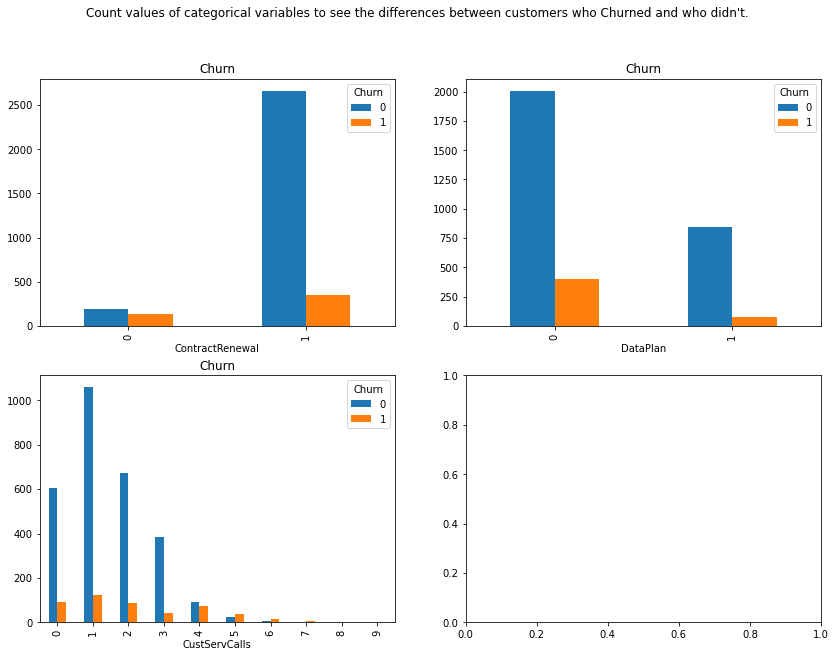

In [552]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
 
fig.suptitle('Count values of categorical variables to see the differences between customers who Churned and who didn\'t.')

#######################################################################################################################
df_count_series = df[['Churn','ContractRenewal']].value_counts()
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='ContractRenewal', columns='Churn', values=0).plot(kind='bar',ax=axes[0, 0],title='Churn')
#######################################################################################################################

#######################################################################################################################
df_count_series = df[['Churn','DataPlan']].value_counts()
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='DataPlan', columns='Churn', values=0).plot(kind='bar',ax=axes[0, 1],title='Churn')
#######################################################################################################################


#######################################################################################################################
df_count_series = df[['Churn','CustServCalls']].value_counts()
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='CustServCalls', columns='Churn', values=0).plot(kind='bar',ax=axes[1, 0],title='Churn')
#######################################################################################################################

## Calculating the same, but in percentages

<AxesSubplot:title={'center':'Churn'}, xlabel='CustServCalls'>

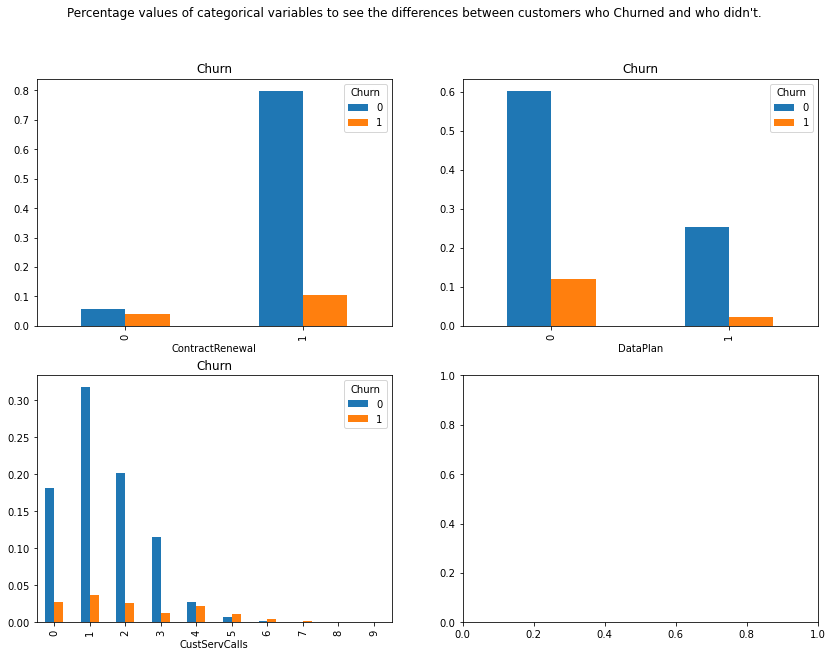

In [553]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
 
fig.suptitle('Percentage values of categorical variables to see the differences between customers who Churned and who didn\'t.')

#######################################################################################################################
df_count_series = df[['Churn','ContractRenewal']].value_counts(normalize=True)
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='ContractRenewal', columns='Churn', values=0).plot(kind='bar',ax=axes[0, 0],title='Churn')
#######################################################################################################################

#######################################################################################################################
df_count_series = df[['Churn','DataPlan']].value_counts(normalize=True)
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='DataPlan', columns='Churn', values=0).plot(kind='bar',ax=axes[0, 1],title='Churn')
#######################################################################################################################


#######################################################################################################################
df_count_series = df[['Churn','CustServCalls']].value_counts(normalize=True)
df_temp = pd.DataFrame(df_count_series)
df_temp = df_temp.reset_index()
df_temp.pivot(index='CustServCalls', columns='Churn', values=0).plot(kind='bar',ax=axes[1, 0],title='Churn')
#######################################################################################################################

Let's talk about our findings:- 
- The gap between people who renewed their contract recently is big for the customers who churned vs customers who did not.
- DataPlan shows us that customers who churned mostly(percentage-wise) did not have a dataplan, contrast this with the customers who did not churn, more of them did have a dataplan when compared to those who did not.
- Looking at CustServCalls, we can see that the customers who churned did not reach out to the customer service much, This is not good as this means we are losing our cutomers even without the customers calling us to tell us what the problem is. 

# Basic Data Preparation

In [554]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [555]:
y = df['Churn']

Converting the categorical variables to dummy.

In [556]:
df_new = pd.get_dummies(df.drop('Churn',axis=1))

In [557]:
df_new

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal_0,ContractRenewal_1,DataPlan_0,...,CustServCalls_0,CustServCalls_1,CustServCalls_2,CustServCalls_3,CustServCalls_4,CustServCalls_5,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9
0,128,2.70,265.1,110,89.0,9.87,10.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,107,3.70,161.6,123,82.0,9.78,13.7,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,137,0.00,243.4,114,52.0,6.06,12.2,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,84,0.00,299.4,71,57.0,3.10,6.6,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,75,0.00,166.7,113,41.0,7.42,10.1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,2.67,156.2,77,71.7,10.78,9.9,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3329,68,0.34,231.1,57,56.4,7.67,9.6,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3330,28,0.00,180.8,109,56.0,14.44,14.1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3331,184,0.00,213.8,105,50.0,7.98,5.0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [558]:
from sklearn.model_selection import train_test_split

In [559]:
X = df_new

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Basic Modelling

In [561]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [562]:
clf.score(X_train, y_train)

0.8443377350940376

In [563]:
clf.score(X_test, y_test)

0.8489208633093526

In [564]:
# Making a Dataframe for scores
df_score = pd.DataFrame({"(Base)Logistic Regression":[clf.score(X_train, y_train),clf.score(X_test, y_test)]})

# Setting up our index
df_score.set_index([pd.Index(['Train','Test'])],inplace=True)

df_score

,(Base)Logistic Regression
Train,0.844338
Test,0.848921


# Feature Importance

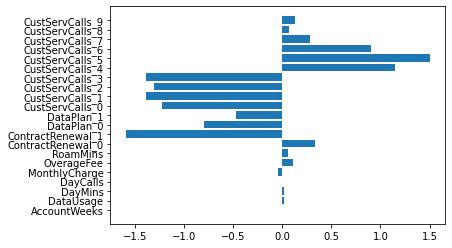

In [565]:
# plot feature importance
importance = clf.coef_[0]
plt.barh(X_train.columns, importance)
plt.show()

# Classification Report

In [566]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       709
           1       0.49      0.22      0.31       125

    accuracy                           0.85       834
   macro avg       0.68      0.59      0.61       834
weighted avg       0.82      0.85      0.82       834



# Confusion Matrix

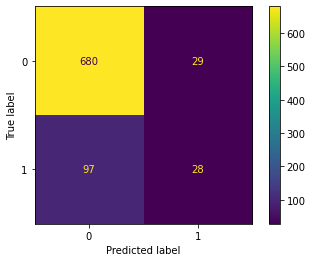

<Figure size 1080x1080 with 0 Axes>

In [567]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [568]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [569]:
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.856      0.828      0.876      0.864      0.816      0.824
 0.816      0.832      0.832      0.86746988]


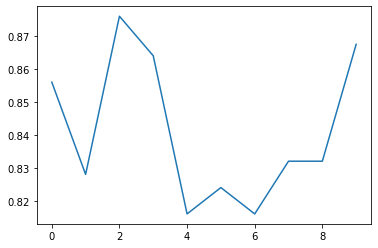

In [570]:
plt.plot(scores)

# Feature Engineering

In [571]:
df_new.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal_0,ContractRenewal_1,DataPlan_0,...,CustServCalls_0,CustServCalls_1,CustServCalls_2,CustServCalls_3,CustServCalls_4,CustServCalls_5,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9
0,128,2.7,265.1,110,89.0,9.87,10.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,107,3.7,161.6,123,82.0,9.78,13.7,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,137,0.0,243.4,114,52.0,6.06,12.2,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,84,0.0,299.4,71,57.0,3.10,6.6,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,75,0.0,166.7,113,41.0,7.42,10.1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


I have 3 ideas in my head by looking at the KDE plots of the continuous variables. Let's see how the play out.
And remember, i don't know if they will work out or not, in data science, we try things and see how they perform.
- Sperate DayMins at 200
- Sperate MonthlyCharge at 60
- Sperate RoamMins at 13

In [572]:
# Creating a new copy of data
df_new_2 = df_new.copy()

In [573]:
# First function
def daymins(x):
    if x > 200:
        return 'Greater than 200'
    else:
        return 'Less than 200'
    
def monthlycharge(x):
    if x > 60:
        return 'Greater than 60'
    else:
        return 'Less than 60'
    
def roammins(x):
    if x > 13:
        return 'Greater than 13'
    else:
        return 'Less than 13'

In [574]:
df_new_2['DayMins'] = df_new_2['DayMins'].apply(daymins)
df_new_2['MonthlyCharge'] = df_new_2['MonthlyCharge'].apply(monthlycharge)
df_new_2['RoamMins'] = df_new_2['RoamMins'].apply(roammins)

In [575]:
df_new_2.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal_0,ContractRenewal_1,DataPlan_0,...,CustServCalls_0,CustServCalls_1,CustServCalls_2,CustServCalls_3,CustServCalls_4,CustServCalls_5,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9
0,128,2.7,Greater than 200,110,Greater than 60,9.87,Less than 13,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,107,3.7,Less than 200,123,Greater than 60,9.78,Greater than 13,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,137,0.0,Greater than 200,114,Less than 60,6.06,Less than 13,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,84,0.0,Greater than 200,71,Less than 60,3.10,Less than 13,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,75,0.0,Less than 200,113,Less than 60,7.42,Less than 13,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [576]:
df_new_2.shape

(3333, 21)

In [577]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AccountWeeks       3333 non-null   int64  
 1   DataUsage          3333 non-null   float64
 2   DayMins            3333 non-null   object 
 3   DayCalls           3333 non-null   int64  
 4   MonthlyCharge      3333 non-null   object 
 5   OverageFee         3333 non-null   float64
 6   RoamMins           3333 non-null   object 
 7   ContractRenewal_0  3333 non-null   uint8  
 8   ContractRenewal_1  3333 non-null   uint8  
 9   DataPlan_0         3333 non-null   uint8  
 10  DataPlan_1         3333 non-null   uint8  
 11  CustServCalls_0    3333 non-null   uint8  
 12  CustServCalls_1    3333 non-null   uint8  
 13  CustServCalls_2    3333 non-null   uint8  
 14  CustServCalls_3    3333 non-null   uint8  
 15  CustServCalls_4    3333 non-null   uint8  
 16  CustServCalls_5    3333 

In [578]:
df_new_3 = pd.get_dummies(df_new_2)

In [579]:
df_new_3.shape

(3333, 24)

In [580]:
df_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AccountWeeks                   3333 non-null   int64  
 1   DataUsage                      3333 non-null   float64
 2   DayCalls                       3333 non-null   int64  
 3   OverageFee                     3333 non-null   float64
 4   ContractRenewal_0              3333 non-null   uint8  
 5   ContractRenewal_1              3333 non-null   uint8  
 6   DataPlan_0                     3333 non-null   uint8  
 7   DataPlan_1                     3333 non-null   uint8  
 8   CustServCalls_0                3333 non-null   uint8  
 9   CustServCalls_1                3333 non-null   uint8  
 10  CustServCalls_2                3333 non-null   uint8  
 11  CustServCalls_3                3333 non-null   uint8  
 12  CustServCalls_4                3333 non-null   u

In [581]:
df_new_3.head()

,AccountWeeks,DataUsage,DayCalls,OverageFee,ContractRenewal_0,ContractRenewal_1,DataPlan_0,DataPlan_1,CustServCalls_0,CustServCalls_1,...,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9,DayMins_Greater than 200,DayMins_Less than 200,MonthlyCharge_Greater than 60,MonthlyCharge_Less than 60,RoamMins_Greater than 13,RoamMins_Less than 13
0,128,2.7,110,9.87,0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
1,107,3.7,123,9.78,0,1,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
2,137,0.0,114,6.06,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,84,0.0,71,3.10,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,75,0.0,113,7.42,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [582]:
from sklearn.model_selection import train_test_split
X = df_new_3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [583]:
# Basic Modelling
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=0)
clf2.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [584]:
clf2.score(X_train, y_train)

0.8855542216886755

In [585]:
clf2.score(X_test, y_test)

0.8920863309352518

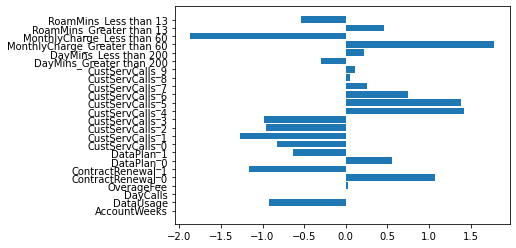

In [586]:
# Feature Importance
# plot feature importance
importance = clf2.coef_[0]
plt.barh(X_train.columns, importance)
plt.show()

# Classification Report

In [587]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       709
           1       0.71      0.48      0.57       125

    accuracy                           0.89       834
   macro avg       0.81      0.72      0.75       834
weighted avg       0.88      0.89      0.88       834



# Confusion Matrix

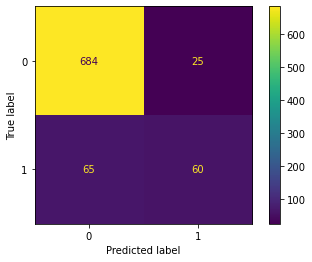

<Figure size 1080x1080 with 0 Axes>

In [588]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2,X_test, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [589]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf2, X_train, y_train, cv=10)

In [599]:
print('Cross-Validation Accuracy Scores', scores2)

Cross-Validation Accuracy Scores [0.892     0.884     0.876     0.888     0.88      0.848     0.868
 0.856     0.88      0.8875502]


# Comparison of cross-validation scores

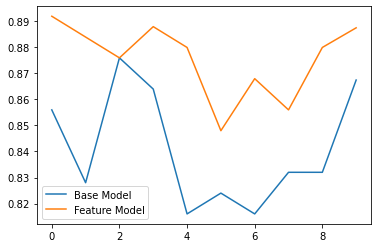

In [602]:
plt.plot([x for x in range(len(scores))],scores,label = "Base Model")
plt.plot([x for x in range(len(scores2))],scores2,label = "Feature Model")
plt.legend()
plt.show()

# Comparing performance

In [603]:
df_score['(Feature_engineered)Logistic Regression'] = [clf2.score(X_train, y_train),clf2.score(X_test, y_test)]

In [604]:
df_score

,(Base)Logistic Regression,(Feature_engineered)Logistic Regression
Train,0.844338,0.885554
Test,0.848921,0.892086


<AxesSubplot:>

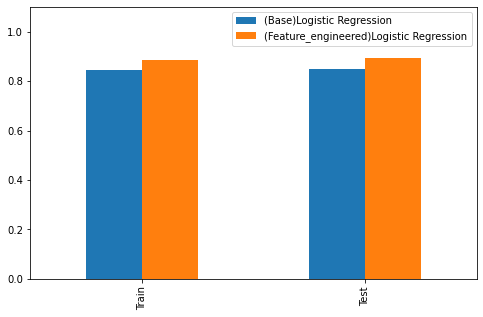

In [605]:
df_score.plot(kind='bar',figsize=(8,5),ylim=(0,1.1))

### Well well, look at that, we not only increased our training accuracy but also our test accuracy as well. And all this without making our model any more complex but rather with creating new features out of our existing data.
<br>
Now, you can probably think of other ways to divide up these continuous variables and i would encourage you to go and try those ideas that you have and see if you can beat these accuracy scores.